Importing the Dependencies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Loading a Dataset to a panda dataframe
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [ ]:
#Printing the First 5 rows of the DataSet
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11678,19921,1.208802,-0.401943,0.901086,-0.697416,-1.014073,-0.281932,-0.828187,0.108108,3.018142,...,-0.137886,-0.007707,-0.075264,-0.065906,0.454008,-0.719787,0.054139,0.015084,11.85,0.0
11679,19924,-1.723814,1.389327,1.411353,-0.716019,-1.561864,1.505156,-2.024937,-5.393713,2.156363,...,5.161661,-1.997550,-0.202928,-0.040939,1.221328,1.155446,0.334758,0.104672,155.38,0.0
11680,19926,1.192037,-0.357840,1.002156,-0.558666,-1.017703,-0.321732,-0.780201,0.062111,3.206257,...,-0.138692,0.082080,0.007441,0.018529,0.378177,-0.693956,0.077499,0.025269,8.35,0.0
11681,19927,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,0.807323,...,0.104104,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99,0.0
11682,19929,1.024814,-1.179948,1.702954,-0.833752,-1.598620,1.270610,-1.786000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11683 non-null  int64  
 1   V1      11683 non-null  float64
 2   V2      11683 non-null  float64
 3   V3      11683 non-null  float64
 4   V4      11683 non-null  float64
 5   V5      11683 non-null  float64
 6   V6      11683 non-null  float64
 7   V7      11683 non-null  float64
 8   V8      11682 non-null  float64
 9   V9      11682 non-null  float64
 10  V10     11682 non-null  float64
 11  V11     11682 non-null  float64
 12  V12     11682 non-null  float64
 13  V13     11682 non-null  float64
 14  V14     11682 non-null  float64
 15  V15     11682 non-null  float64
 16  V16     11682 non-null  float64
 17  V17     11682 non-null  float64
 18  V18     11682 non-null  float64
 19  V19     11682 non-null  float64
 20  V20     11682 non-null  float64
 21  V21     11682 non-null  float64
 22

In [ ]:
# Checking the Missing Values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,1
V9,1


In [ ]:
# Distribution of legit Transaction & Fraudlent Transaction
credit_card_data['Class'].value_counts()

,count
Class,
0.0,11633
1.0,49


This DataSet is highly Unbalanced


0 ---> Normal Transaction

1 --->Fraudulent Transaction

In [ ]:
#Seperating the data for Analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(11633, 31)
(49, 31)


In [ ]:
#statistical Measures of the Data
legit.Amount.describe()

,Amount
count,11633.000000
mean,62.572337
std,178.797878
min,0.000000
25%,5.180000
50%,15.950000
75%,50.000000
max,7712.430000


In [ ]:
fraud.Amount.describe()

,Amount
count,49.000000
mean,103.646735
std,330.135333
min,0.000000
25%,1.000000
50%,1.000000
75%,3.790000
max,1809.680000


In [ ]:
# compare the values for both Transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7704.887045,-0.207050,0.258760,0.932029,0.255271,-0.072059,0.149001,-0.091701,-0.056148,0.908510,...,0.022749,-0.063091,-0.155601,-0.032732,0.019105,0.102891,0.069101,0.004954,0.000138,62.572337
1.0,11037.265306,-3.064862,4.008973,-7.336847,6.060331,-1.951918,-1.970106,-5.100011,0.977442,-2.509118,...,0.375559,0.468232,-0.088481,-0.427921,-0.367523,-0.136910,0.285971,0.603784,0.149533,103.646735


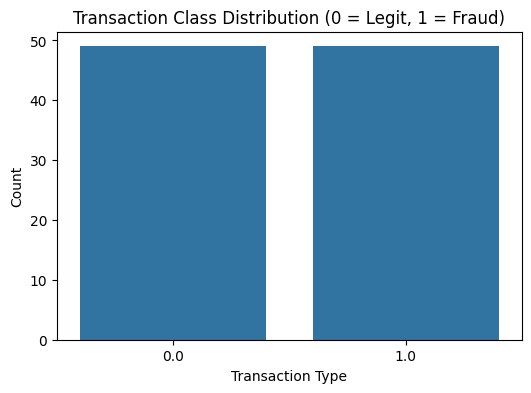

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=new_dataset)
plt.title("Transaction Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

Under-Sampling


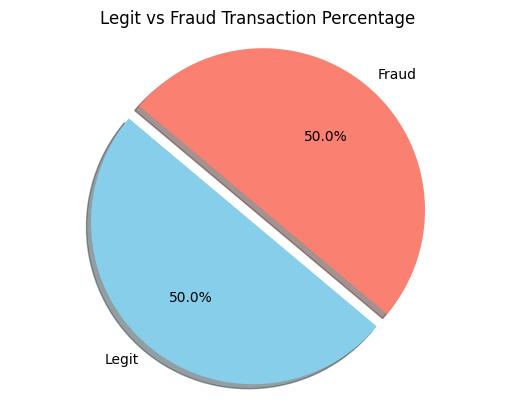

In [ ]:
labels = ['Legit', 'Fraud']
sizes = new_dataset['Class'].value_counts()
colors = ['skyblue', 'salmon']
explode = (0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Legit vs Fraud Transaction Percentage")
plt.axis('equal')
plt.show()

Build a simple dataset containing similar distribution of normal transaction and Fraudulent Transactions


Number of Fraudulent Transactions --->492


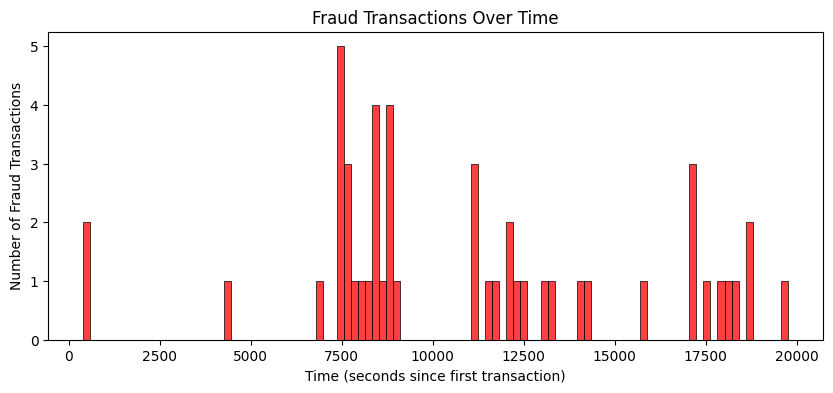

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(fraud['Time'], bins=100, color='red')
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Number of Fraud Transactions")
plt.show()


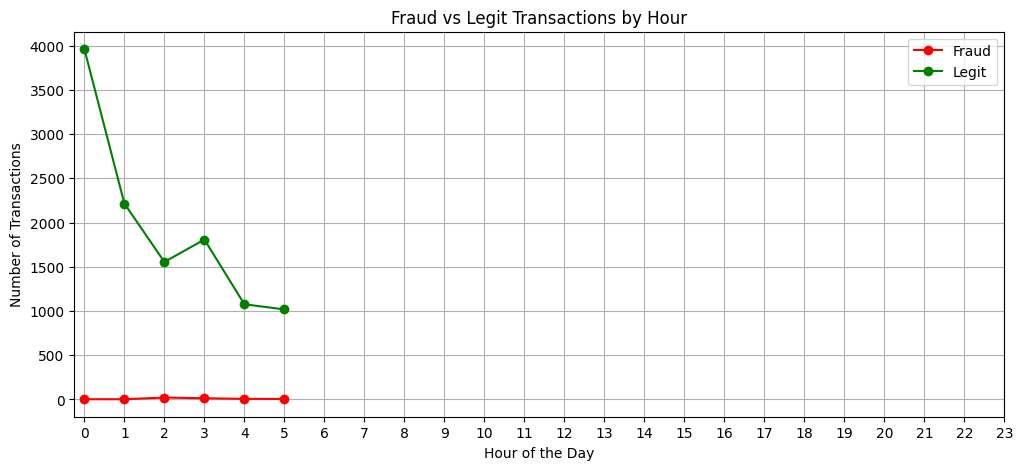

In [ ]:
credit_card_data['Hour'] = (credit_card_data['Time'] // 3600) % 24
fraud_hourly = credit_card_data[credit_card_data['Class'] == 1]['Hour'].value_counts().sort_index()
legit_hourly = credit_card_data[credit_card_data['Class'] == 0]['Hour'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(fraud_hourly.index, fraud_hourly.values, label='Fraud', color='red', marker='o')
plt.plot(legit_hourly.index, legit_hourly.values, label='Legit', color='green', marker='o')
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Fraud vs Legit Transactions by Hour')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
legit_sample = legit.sample(n=492, random_state=2)

Concatenating two DataFrames

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)  #For adding row-wise

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
193,127,1.356489,-0.221355,-1.236996,-1.246835,1.907809,3.103911,-0.603384,0.762841,0.118339,...,-0.163829,-0.602688,0.011113,1.063845,0.400726,0.975862,-0.081220,-0.003314,1.54,0.0
10618,17779,-1.443215,-0.471996,1.685820,-2.069362,-0.130730,2.107028,0.425356,0.556015,2.419122,...,0.239261,1.160957,-0.042285,-1.383034,0.068310,-0.658253,0.109822,0.104398,237.32,0.0
7676,10643,-2.372834,-0.612308,3.224686,3.758968,-0.483226,1.615778,-1.719115,1.101559,1.853864,...,-0.021965,0.630479,-0.499405,0.021481,0.060255,0.499542,0.329417,-0.259837,61.43,0.0
9330,13515,1.223788,0.012901,0.874744,0.319244,-0.806493,-0.870352,-0.354155,-0.202414,1.682257,...,-0.332747,-0.777476,0.149688,0.367724,-0.024413,0.747671,-0.093793,0.012013,26.56,0.0
7887,10953,1.188128,-0.135292,0.954442,0.271600,-0.989674,-0.663624,-0.619905,0.001789,1.653985,...,-0.015797,0.116493,0.012317,0.517974,0.106664,1.005405,-0.101182,-0.005015,15.95,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10690,18088,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1.0
10801,18399,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00,1.0
10891,18675,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,...,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,188.78,1.0
10897,18690,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1.0
11343,19762,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,49


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7509.725610,-0.238515,0.293559,0.988619,0.273016,-0.145692,0.092071,-0.132085,-0.010360,0.954478,...,0.022496,-0.022387,-0.149376,-0.044070,0.024753,0.115047,0.125086,0.031894,-0.001032,57.060955
1.0,11037.265306,-3.064862,4.008973,-7.336847,6.060331,-1.951918,-1.970106,-5.100011,0.977442,-2.509118,...,0.375559,0.468232,-0.088481,-0.427921,-0.367523,-0.136910,0.285971,0.603784,0.149533,103.646735


Splitting the Data into Features and Targets

In [ ]:
X=new_dataset.drop(columns='Class',axis=1) #Axis=1 Represent Columns
Y=new_dataset['Class']

In [ ]:
print(X)


        Time         V1        V2         V3         V4         V5        V6  \
193      127   1.356489 -0.221355  -1.236996  -1.246835   1.907809  3.103911   
10618  17779  -1.443215 -0.471996   1.685820  -2.069362  -0.130730  2.107028   
7676   10643  -2.372834 -0.612308   3.224686   3.758968  -0.483226  1.615778   
9330   13515   1.223788  0.012901   0.874744   0.319244  -0.806493 -0.870352   
7887   10953   1.188128 -0.135292   0.954442   0.271600  -0.989674 -0.663624   
...      ...        ...       ...        ...        ...        ...       ...   
10690  18088 -12.224021  3.854150 -12.466766   9.648311  -2.726961 -4.445610   
10801  18399 -14.474437  6.503185 -17.712632  11.270352  -4.150142 -3.372098   
10891  18675 -12.339603  4.488267 -16.587073  10.107274 -10.420199  0.130670   
10897  18690 -15.398845  7.472324 -19.026912  11.165526  -6.893856 -2.120937   
11343  19762 -14.179165  7.421370 -21.405836  11.927512  -7.974281 -2.202710   

              V7        V8        V9  .

In [ ]:
print(Y)

193      0.0
10618    0.0
7676     0.0
9330     0.0
7887     0.0
        ... 
10690    1.0
10801    1.0
10891    1.0
10897    1.0
11343    1.0
Name: Class, Length: 541, dtype: float64


Splitting the Data into Training Data and Testing Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(  X.shape,X_train.shape,X_test.shape)

(541, 30) (432, 30) (109, 30)


Model Training

Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=10000)

In [ ]:
#training the Logistic Regression Model with Training Data
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')  # You can also try 'rbf'
svm_model.fit(X_train, Y_train)

# Predictions and Accuracy
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(svm_predictions, Y_test)
print("SVM Model Accuracy:", svm_accuracy)


SVM Model Accuracy: 0.981651376146789


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predictions and Accuracy
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(rf_predictions, Y_test)
print("Random Forest Model Accuracy:", rf_accuracy)


Random Forest Model Accuracy: 0.981651376146789


Model Evaluation

Accuracy Score


In [ ]:
#Accuracy on Training Data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on Training Data :',training_data_accuracy)

Accuracy on Training Data : 0.9930555555555556


In [ ]:
# Accuracy on Test Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score on Test Data :',test_data_accuracy)

Accuracy score on Test Data : 1.0


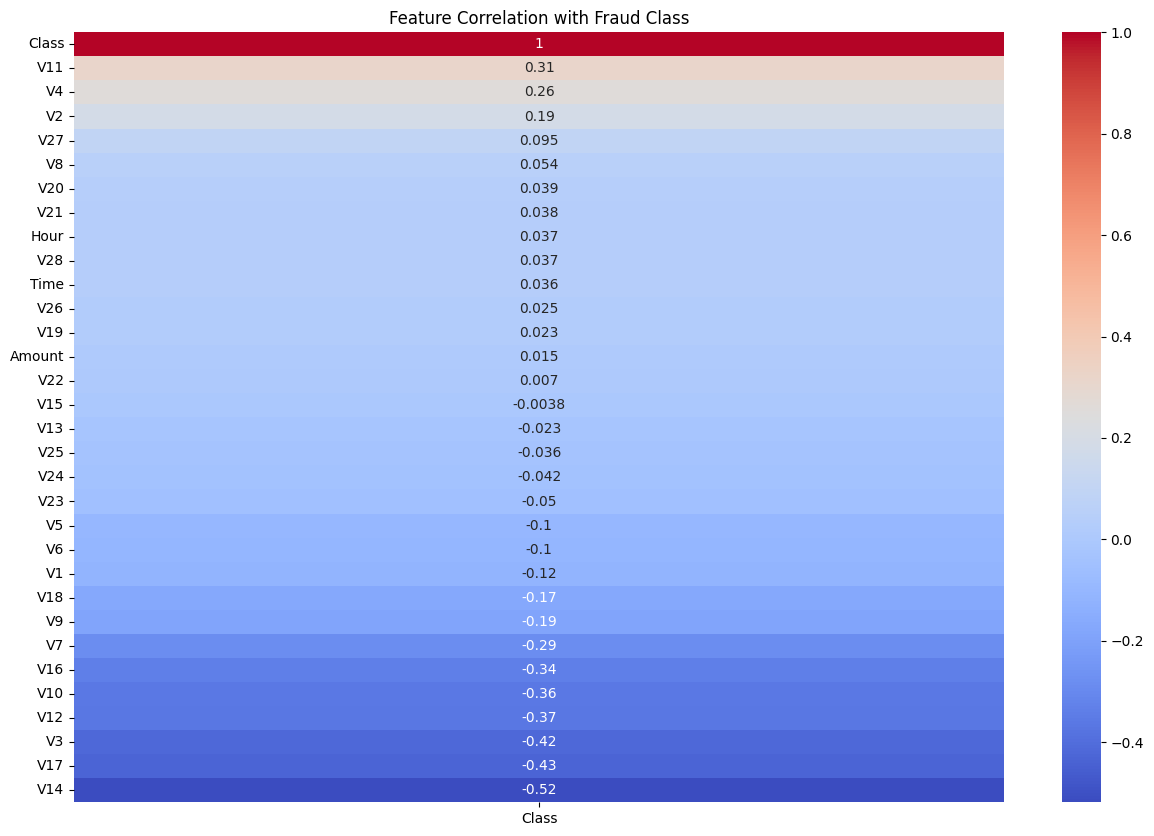

In [ ]:
plt.figure(figsize=(15,10))
corr = credit_card_data.corr()
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Fraud Class")
plt.show()


Accuracy Score of Different Models


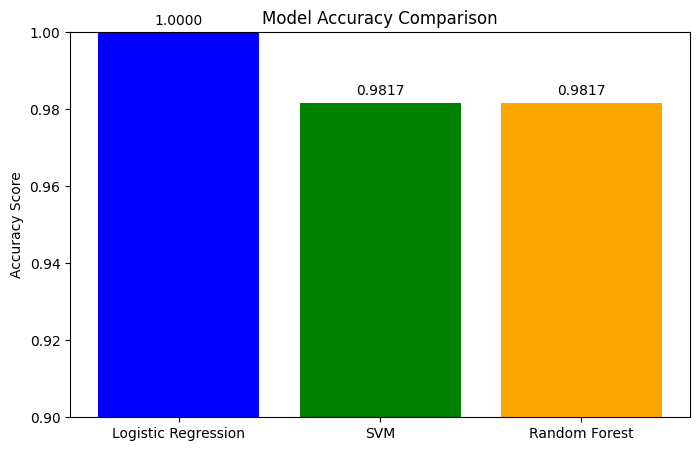

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [test_data_accuracy, svm_accuracy, rf_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.90, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center')
plt.show()



First, I will create a balanced dataset by undersampling the legit transactions to match the number of fraudulent transactions.

In [ ]:
# Number of Fraudulent Transactions
num_fraudulent = fraud.shape[0]

# Randomly sample legit transactions
legit_sample = legit.sample(n=num_fraudulent, random_state=2)

Then, I will concatenate the two dataframes to create a new dataset with a balanced distribution of transactions.

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

Now, I will display the count plot to visualize the distribution of transaction classes in the new dataset.

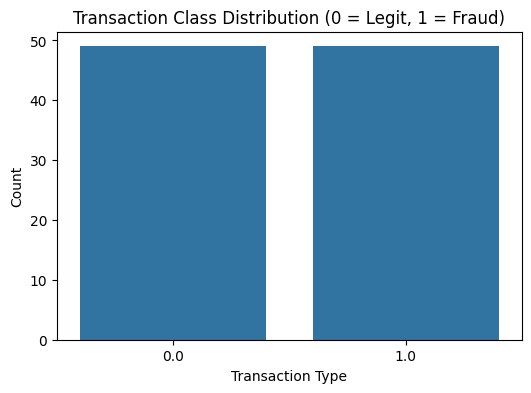

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=new_dataset)
plt.title("Transaction Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

Finally, I will display the pie chart to visualize the percentage of legit and fraudulent transactions in the new dataset.

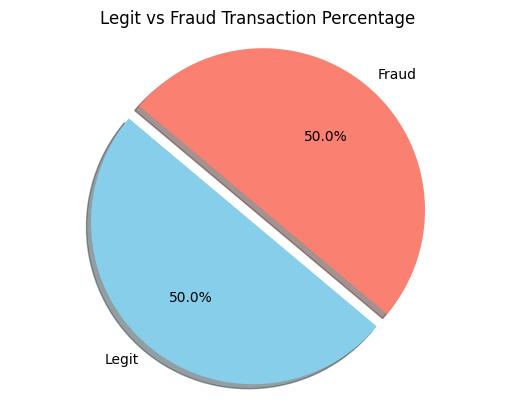

In [ ]:
labels = ['Legit', 'Fraud']
sizes = new_dataset['Class'].value_counts()
colors = ['skyblue', 'salmon']
explode = (0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Legit vs Fraud Transaction Percentage")
plt.axis('equal')
plt.show()